In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import nimfa
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer
import random
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore') # to ignore the update warning, could also be se to (action='once')
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
# Question A

In [3]:
df =  pd.read_csv('ICW2_Dataset.csv', index_col=0)

In [4]:
df

,TCGA.13.0899.OV.C1_,TCGA.14.0871.GBM.C1_,TCGA.21.1082.LUSC.C1_,TCGA.22.1002.LUSC.C1_,TCGA.22.1012.LUSC.C1_,TCGA.24.1427.OV.C1_,TCGA.24.1430.OV.C1_,TCGA.24.2019.OV.C1_,TCGA.25.2393.OV.C1_,TCGA.29.2425.OV.C1_,...,TCGA.UD.AABY.MESO.C6_,TCGA.UT.A88G.MESO.C6_,TCGA.W5.AA2Z.CHOL.C6_,TCGA.WS.AB45.COAD.C6_,TCGA.XF.A8HB.BLCA.C6_,TCGA.XF.AAN8.BLCA.C6_,TCGA.XV.AAZV.SKCM.C6_,TCGA.Y8.A8S1.KIRP.C6_,TCGA.ZN.A9VP.MESO.C6_,TCGA.ZN.A9VW.MESO.C6_
ACTL6A,10.658199,9.602435,11.908363,10.953273,11.078404,10.412484,10.523878,10.562000,11.010065,9.742919,...,9.475600,9.570271,9.717642,9.740560,11.277078,8.626118,9.404835,8.805515,9.951021,10.027519
ADAM9,9.871269,10.673830,11.050488,14.410080,10.770862,10.697936,9.848390,11.253212,11.844310,9.938850,...,11.312094,11.545355,12.430202,12.450603,10.977974,10.796672,10.600991,9.883515,12.056922,13.836287
ADAMTS1,10.329041,10.933890,9.614623,11.862262,9.022920,10.818728,13.104788,8.010973,11.059385,12.274446,...,9.190106,12.591024,9.202058,12.337859,7.915312,13.660843,11.664243,10.851858,9.704222,8.744400
ADCY7,8.349635,7.705066,9.446887,9.807046,8.892157,9.587109,6.529537,8.433843,8.558352,10.107739,...,10.283007,10.069329,8.043334,10.322694,7.199280,8.928459,9.261646,9.499561,9.240212,10.681028
AIMP2,9.832609,9.185168,9.128482,8.679994,9.983535,8.763759,9.635345,9.236772,10.352898,9.080972,...,8.271584,9.251672,8.798426,8.529118,10.091449,8.901036,9.512213,9.790138,8.604045,8.612459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,13.508895,11.948761,11.472584,12.291421,11.949393,13.293394,11.954488,12.290652,11.315339,11.943775,...,13.000475,13.013106,12.155387,13.034789,11.836125,13.604762,14.195288,13.088386,13.921367,13.374550
MMP3,0.3922258,2.8855353,7.9716872,8.9156643,8.7705846,0.5852190,7.3078930,0.5779196,6.8564026,5.1042589,...,6.8597708,3.3880104,0.9190731,12.7164101,0.0000000,4.3883962,6.6153030,2.1926361,0.5332643,1.4597988
PLG,11.304151777,0.000000000,0.491493981,0.000000000,0.000000000,5.746016783,1.217809746,10.144732468,13.891349549,4.155146421,...,0.000000000,0.000000000,4.455189110,1.142021259,3.037768763,0.000000000,0.000000000,4.063011031,0.000000000,0.000000000
RGS8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.04063531,0.24320192,0.00000000,0.07995263,0.21265234,...,0.61183337,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [5]:
# Transposing the dataframe
df_transposed = df.T
df_transposed

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Subgroup
TCGA.13.0899.OV.C1_,10.658199,9.871269,10.329041,8.349635,9.832609,12.284383,7.660111,6.938481,9.296792,10.142260,...,8.379818,3.6771341,1.20955975,10.364934,8.156849,13.508895,0.3922258,11.304151777,0.00000000,C1
TCGA.14.0871.GBM.C1_,9.602435,10.673830,10.933890,7.705066,9.185168,9.801505,5.789549,6.020098,7.816606,7.516559,...,10.957262,4.3340891,0.00000000,9.886744,9.784933,11.948761,2.8855353,0.000000000,0.00000000,C1
TCGA.21.1082.LUSC.C1_,11.908363,11.050488,9.614623,9.446887,9.128482,9.380790,8.250782,8.843120,8.413069,11.684889,...,10.440807,8.9499930,0.49149398,10.087410,10.251553,11.472584,7.9716872,0.491493981,0.00000000,C1
TCGA.22.1002.LUSC.C1_,10.953273,14.410080,11.862262,9.807046,8.679994,8.269893,9.409834,7.543326,7.625986,9.441367,...,10.247548,5.5841087,1.93293046,11.198187,9.078482,12.291421,8.9156643,0.000000000,0.00000000,C1
TCGA.22.1012.LUSC.C1_,11.078404,10.770862,9.022920,8.892157,9.983535,10.119330,8.078621,8.162270,8.682233,10.096781,...,9.436104,10.1229315,1.07929277,11.803845,9.320155,11.949393,8.7705846,0.000000000,0.00000000,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.XF.AAN8.BLCA.C6_,8.626118,10.796672,13.660843,8.928459,8.901036,10.112909,10.269851,7.503325,6.948449,9.860738,...,11.015645,4.1774395,0.00000000,10.564883,7.023455,13.604762,4.3883962,0.000000000,0.00000000,C6
TCGA.XV.AAZV.SKCM.C6_,9.404835,10.600991,11.664243,9.261646,9.512213,10.134118,8.595202,8.096362,6.862836,11.808807,...,12.545611,3.4200781,0.00000000,10.451046,8.552419,14.195288,6.6153030,0.000000000,0.00000000,C6
TCGA.Y8.A8S1.KIRP.C6_,8.805515,9.883515,10.851858,9.499561,9.790138,11.506590,9.573106,10.024738,6.773377,13.464980,...,10.817439,2.7472370,0.77761960,10.649894,5.610496,13.088386,2.1926361,4.063011031,0.00000000,C6
TCGA.ZN.A9VP.MESO.C6_,9.951021,12.056922,9.704222,9.240212,8.604045,10.555998,9.184746,7.116302,8.686192,10.216964,...,10.512049,4.8443907,1.22755626,10.003504,8.659140,13.921367,0.5332643,0.000000000,0.00000000,C6


In [6]:
# Checking for any missing values
df_transposed.isnull().values.any()  

False

In [7]:
# There are no missing values in the dataset

In [8]:
# Getting all groups which are part of the column name
df_2 = list(df.columns.values)
df_2

['TCGA.13.0899.OV.C1_',
 'TCGA.14.0871.GBM.C1_',
 'TCGA.21.1082.LUSC.C1_',
 'TCGA.22.1002.LUSC.C1_',
 'TCGA.22.1012.LUSC.C1_',
 'TCGA.24.1427.OV.C1_',
 'TCGA.24.1430.OV.C1_',
 'TCGA.24.2019.OV.C1_',
 'TCGA.25.2393.OV.C1_',
 'TCGA.29.2425.OV.C1_',
 'TCGA.2G.AAGS.TGCT.C1_',
 'TCGA.2G.AAH4.TGCT.C1_',
 'TCGA.2G.AAKM.TGCT.C1_',
 'TCGA.2G.AALG.TGCT.C1_',
 'TCGA.2G.AALN.TGCT.C1_',
 'TCGA.2G.AALR.TGCT.C1_',
 'TCGA.2H.A9GM.ESCA.C1_',
 'TCGA.2J.AABV.PAAD.C1_',
 'TCGA.2L.AAQI.PAAD.C1_',
 'TCGA.30.1891.OV.C1_',
 'TCGA.31.1944.OV.C1_',
 'TCGA.33.A4WN.LUSC.C1_',
 'TCGA.34.5239.LUSC.C1_',
 'TCGA.39.5027.LUSC.C1_',
 'TCGA.39.5031.LUSC.C1_',
 'TCGA.39.5034.LUSC.C1_',
 'TCGA.39.5037.LUSC.C1_',
 'TCGA.39.5040.LUSC.C1_',
 'TCGA.3A.A9I5.PAAD.C1_',
 'TCGA.3B.A9HI.SARC.C1_',
 'TCGA.3C.AALI.BRCA.C1_',
 'TCGA.3L.AA1B.COAD.C1_',
 'TCGA.43.3394.LUSC.C1_',
 'TCGA.43.6143.LUSC.C1_',
 'TCGA.43.6770.LUSC.C1_',
 'TCGA.44.8119.LUAD.C1_',
 'TCGA.49.AAR9.LUAD.C1_',
 'TCGA.4Z.AA7R.BLCA.C1_',
 'TCGA.4Z.AA87.BLCA.C1_',
 'T

In [9]:
df_2_last = df_2[1]
df_2_last

'TCGA.14.0871.GBM.C1_'

In [10]:
i = 1
print(df_2_last[1])

C


In [11]:
df_3 = df_2
for i in range(2009):
    df_2_last = df_2[i]
    print(df_2_last[-2])
    df_3[i] = df_2_last[-2]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [12]:
df_transposed['Sub_Group'] = df_3

In [13]:
df_transposed

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Subgroup,Sub_Group
TCGA.13.0899.OV.C1_,10.658199,9.871269,10.329041,8.349635,9.832609,12.284383,7.660111,6.938481,9.296792,10.142260,...,3.6771341,1.20955975,10.364934,8.156849,13.508895,0.3922258,11.304151777,0.00000000,C1,1
TCGA.14.0871.GBM.C1_,9.602435,10.673830,10.933890,7.705066,9.185168,9.801505,5.789549,6.020098,7.816606,7.516559,...,4.3340891,0.00000000,9.886744,9.784933,11.948761,2.8855353,0.000000000,0.00000000,C1,1
TCGA.21.1082.LUSC.C1_,11.908363,11.050488,9.614623,9.446887,9.128482,9.380790,8.250782,8.843120,8.413069,11.684889,...,8.9499930,0.49149398,10.087410,10.251553,11.472584,7.9716872,0.491493981,0.00000000,C1,1
TCGA.22.1002.LUSC.C1_,10.953273,14.410080,11.862262,9.807046,8.679994,8.269893,9.409834,7.543326,7.625986,9.441367,...,5.5841087,1.93293046,11.198187,9.078482,12.291421,8.9156643,0.000000000,0.00000000,C1,1
TCGA.22.1012.LUSC.C1_,11.078404,10.770862,9.022920,8.892157,9.983535,10.119330,8.078621,8.162270,8.682233,10.096781,...,10.1229315,1.07929277,11.803845,9.320155,11.949393,8.7705846,0.000000000,0.00000000,C1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.XF.AAN8.BLCA.C6_,8.626118,10.796672,13.660843,8.928459,8.901036,10.112909,10.269851,7.503325,6.948449,9.860738,...,4.1774395,0.00000000,10.564883,7.023455,13.604762,4.3883962,0.000000000,0.00000000,C6,6
TCGA.XV.AAZV.SKCM.C6_,9.404835,10.600991,11.664243,9.261646,9.512213,10.134118,8.595202,8.096362,6.862836,11.808807,...,3.4200781,0.00000000,10.451046,8.552419,14.195288,6.6153030,0.000000000,0.00000000,C6,6
TCGA.Y8.A8S1.KIRP.C6_,8.805515,9.883515,10.851858,9.499561,9.790138,11.506590,9.573106,10.024738,6.773377,13.464980,...,2.7472370,0.77761960,10.649894,5.610496,13.088386,2.1926361,4.063011031,0.00000000,C6,6
TCGA.ZN.A9VP.MESO.C6_,9.951021,12.056922,9.704222,9.240212,8.604045,10.555998,9.184746,7.116302,8.686192,10.216964,...,4.8443907,1.22755626,10.003504,8.659140,13.921367,0.5332643,0.000000000,0.00000000,C6,6


In [14]:
random_sample1 = df_transposed[df_transposed['Sub_Group'] == '1']
random_sample2 = df_transposed[df_transposed['Sub_Group'] == '2']
random_sample3 = df_transposed[df_transposed['Sub_Group'] == '3']
random_sample4 = df_transposed[df_transposed['Sub_Group'] == '4']
random_sample5 = df_transposed[df_transposed['Sub_Group'] == '5']
random_sample6 = df_transposed[df_transposed['Sub_Group'] == '6']

In [15]:
balanced_sample1 = random_sample1.sample(n=122, random_state = 123, replace = True)
balanced_sample2 = random_sample2.sample(n=122, random_state = 123, replace = True)
balanced_sample3 = random_sample3.sample(n=122, random_state = 123, replace = True)
balanced_sample4 = random_sample4.sample(n=122, random_state = 123, replace = True)
balanced_sample5 = random_sample5.sample(n=122, random_state = 123, replace = True)
balanced_sample6 = random_sample6.sample(n=122, random_state = 123, replace = True)

In [16]:
# Question 1
# Balanced dataset created with 122 samples randomly chosen in each group
balanced_dataset = pd.concat([balanced_sample1,balanced_sample2,balanced_sample3,balanced_sample4,balanced_sample5,balanced_sample6])
balanced_dataset

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Subgroup,Sub_Group
TCGA.VS.A9UV.CESC.C1_,11.791134,9.670770,7.379526,8.412312,8.494492,9.664051,6.209888,9.260463,8.733832,8.031864,...,6.6972734,1.05783147,11.641623,9.610872,11.781192,5.1100374,0.000000000,0.00000000,C1,1
TCGA.ZF.AA4U.BLCA.C1_,10.901855,11.458673,8.290954,6.382129,9.167403,9.951918,4.323183,7.243698,8.097005,7.700988,...,1.6383056,0.61192777,11.233793,8.803418,12.929991,1.0401911,0.000000000,0.00000000,C1,1
TCGA.LL.A9Q3.BRCA.C1_,9.449367,11.281414,7.254103,8.632312,9.409353,10.937639,8.129489,7.390745,8.210973,12.432336,...,2.8209142,0.59024271,10.856970,7.618606,12.409728,6.5154759,0.000000000,0.00000000,C1,1
TCGA.A8.A08X.BRCA.C1_,11.000218,10.567395,8.727219,9.602743,9.245284,8.463230,9.273740,7.607190,8.021352,10.788759,...,4.2029035,2.00100953,10.975475,8.977672,12.347970,8.5373970,0.678612814,0.67861281,C1,1
TCGA.D8.A143.BRCA.C1_,11.786106,10.176722,8.705629,9.088065,8.783840,8.735387,7.815876,8.098701,8.715842,8.155309,...,4.6986241,1.86710573,10.731879,9.585819,11.183859,6.8438080,0.000000000,0.00000000,C1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.D8.A141.BRCA.C6_,9.935483,11.387118,8.944949,10.866954,8.615589,8.650883,9.555609,8.793824,7.564127,10.367731,...,5.6733868,1.23970354,10.838274,8.587065,12.172227,8.4757456,0.000000000,0.00000000,C6,6
TCGA.SH.A7BC.MESO.C6_,9.830102,12.276979,12.083795,10.641998,9.284815,9.747884,10.346059,9.249533,7.336739,11.344057,...,10.5808050,2.08851478,10.748956,8.569711,13.365953,5.9196166,0.000000000,0.00000000,C6,6
TCGA.43.2581.LUSC.C6_,10.162933,11.892930,10.868522,10.461776,9.506677,8.888749,11.244013,9.375967,7.052090,10.793555,...,3.6039645,1.28682202,10.845843,8.367528,12.666686,6.2523627,0.000000000,0.00000000,C6,6
TCGA.05.4425.LUAD.C6_,10.210123,11.325097,10.343486,9.984860,8.745668,9.571626,10.674104,9.305572,7.269033,11.633063,...,6.2476617,2.12353377,10.616135,8.464591,11.729893,0.6411761,0.000000000,0.00000000,C6,6


In [17]:
# Shows that each group has 122 samples
balanced_dataset['Sub_Group'].value_counts()

1    122
2    122
3    122
4    122
5    122
6    122
Name: Sub_Group, dtype: int64

In [18]:
balanced_dataset_without_group = balanced_dataset.drop(columns=['Subgroup'])

In [19]:
# Question 2
# Finding out how many components show variance
pca = PCA().fit(balanced_dataset_without_group)
pca_components_df = pca.explained_variance_ratio_.cumsum() > 0.70
number_of_components = 442 - pca_components_df.sum()
number_of_components

10

In [20]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(balanced_dataset_without_group)
principal_dataset = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

<Figure size 480x480 with 0 Axes>

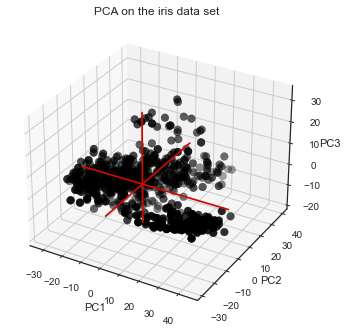

In [21]:
# Get the PC dataset
sns.set_style("white")
df = principal_dataset

# Create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(principal_dataset)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(principal_dataset), columns=['PCA%i' % i for i in range(3)], index=principal_dataset.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c= 'black', s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# Label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

In [22]:
# Carrying out normalisation on the data
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(balanced_dataset_without_group)
normalised_data

array([[0.75189108, 0.44592512, 0.20085547, ..., 0.10045145, 0.        ,
        0.        ],
       [0.61960416, 0.65494967, 0.29860891, ..., 0.10045145, 0.        ,
        0.        ],
       [0.40353567, 0.63422624, 0.18740347, ..., 0.10045145, 0.        ,
        0.        ],
       ...,
       [0.50968396, 0.70571885, 0.57506094, ..., 0.10045145, 0.        ,
        1.        ],
       [0.51670383, 0.63933324, 0.51874923, ..., 0.10045145, 0.        ,
        1.        ],
       [0.42144548, 0.8645721 , 0.64621787, ..., 0.1250302 , 0.        ,
        1.        ]])

In [23]:
# Putting the normalised data into a dataframe
scaled_dataset = pd.DataFrame(normalised_data, columns=balanced_dataset_without_group.columns)
scaled_dataset

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Sub_Group
0,0.751891,0.445925,0.200855,0.478778,0.672409,0.534645,0.437753,0.613560,0.698306,0.219630,...,0.311202,0.594246,0.224029,0.609240,0.788482,0.609907,0.350504,0.100451,0.000000,0.0
1,0.619604,0.654950,0.298609,0.152745,0.760586,0.579984,0.268297,0.364829,0.556873,0.197631,...,0.446937,0.145366,0.166105,0.516127,0.666692,0.785667,0.092796,0.100451,0.000000,0.0
2,0.403536,0.634226,0.187403,0.514108,0.792291,0.735238,0.610164,0.382964,0.582184,0.512200,...,0.608753,0.250298,0.163288,0.430094,0.487983,0.706070,0.439498,0.100451,0.000000,0.0
3,0.634236,0.550750,0.345400,0.669953,0.770792,0.345512,0.712936,0.409659,0.540071,0.402925,...,0.748857,0.372922,0.346550,0.457150,0.692975,0.696621,0.567528,0.136665,0.098358,0.0
4,0.751143,0.505076,0.343084,0.587299,0.710325,0.388378,0.581996,0.470278,0.694310,0.227837,...,0.582832,0.416907,0.329155,0.401534,0.784704,0.518518,0.460288,0.100451,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.475849,0.646584,0.368752,0.872976,0.688277,0.375068,0.738252,0.556009,0.438526,0.374932,...,0.870608,0.503397,0.247654,0.425825,0.634059,0.669733,0.563625,0.100451,0.000000,1.0
728,0.460173,0.750618,0.705403,0.836849,0.775972,0.547849,0.809247,0.612212,0.388026,0.439844,...,0.773545,0.938830,0.357917,0.405433,0.631441,0.852367,0.401767,0.100451,0.000000,1.0
729,0.509684,0.705719,0.575061,0.807907,0.805044,0.412533,0.889897,0.627805,0.324808,0.403244,...,0.779055,0.319778,0.253775,0.427553,0.600945,0.745383,0.422837,0.100451,0.000000,1.0
730,0.516704,0.639333,0.518749,0.731318,0.705323,0.520088,0.838710,0.619123,0.372989,0.459059,...,0.769967,0.554352,0.362466,0.375108,0.615586,0.602059,0.067530,0.100451,0.000000,1.0


In [24]:
# Removing missing values from dataset
scaled_dataset = scaled_dataset.drop(columns=['Sub_Group'])
scaled_dataset

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WDR77,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8
0,0.751891,0.445925,0.200855,0.478778,0.672409,0.534645,0.437753,0.613560,0.698306,0.219630,...,0.636448,0.311202,0.594246,0.224029,0.609240,0.788482,0.609907,0.350504,0.100451,0.000000
1,0.619604,0.654950,0.298609,0.152745,0.760586,0.579984,0.268297,0.364829,0.556873,0.197631,...,0.632251,0.446937,0.145366,0.166105,0.516127,0.666692,0.785667,0.092796,0.100451,0.000000
2,0.403536,0.634226,0.187403,0.514108,0.792291,0.735238,0.610164,0.382964,0.582184,0.512200,...,0.277749,0.608753,0.250298,0.163288,0.430094,0.487983,0.706070,0.439498,0.100451,0.000000
3,0.634236,0.550750,0.345400,0.669953,0.770792,0.345512,0.712936,0.409659,0.540071,0.402925,...,0.297367,0.748857,0.372922,0.346550,0.457150,0.692975,0.696621,0.567528,0.136665,0.098358
4,0.751143,0.505076,0.343084,0.587299,0.710325,0.388378,0.581996,0.470278,0.694310,0.227837,...,0.693161,0.582832,0.416907,0.329155,0.401534,0.784704,0.518518,0.460288,0.100451,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.475849,0.646584,0.368752,0.872976,0.688277,0.375068,0.738252,0.556009,0.438526,0.374932,...,0.390124,0.870608,0.503397,0.247654,0.425825,0.634059,0.669733,0.563625,0.100451,0.000000
728,0.460173,0.750618,0.705403,0.836849,0.775972,0.547849,0.809247,0.612212,0.388026,0.439844,...,0.479048,0.773545,0.938830,0.357917,0.405433,0.631441,0.852367,0.401767,0.100451,0.000000
729,0.509684,0.705719,0.575061,0.807907,0.805044,0.412533,0.889897,0.627805,0.324808,0.403244,...,0.486459,0.779055,0.319778,0.253775,0.427553,0.600945,0.745383,0.422837,0.100451,0.000000
730,0.516704,0.639333,0.518749,0.731318,0.705323,0.520088,0.838710,0.619123,0.372989,0.459059,...,0.591684,0.769967,0.554352,0.362466,0.375108,0.615586,0.602059,0.067530,0.100451,0.000000


In [25]:
V = scaled_dataset.to_numpy()
n_rank = range(3,12,1)
lsnmf = nimfa.Lsnmf(V, max_iter=100) 
summary = lsnmf.estimate_rank(rank_range=n_rank, what='all')

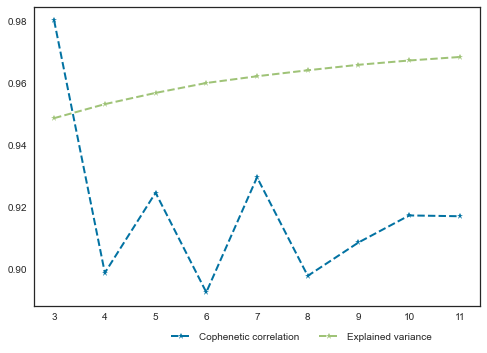

In [26]:
cophenetic = [summary[rank]['cophenetic'] for rank in n_rank]
evar = [summary[rank]['evar'] for rank in n_rank] #Compute the explained variance of the NMF estimate of the target matrix.

plt.plot(n_rank, cophenetic, '*--', label='Cophenetic correlation', linewidth=2)
plt.plot(n_rank, evar, '*--', label='Explained variance', linewidth=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06), ncol=3, numpoints=1)


In [27]:
# Question 3
# Creating an NMF instance, initial rank = 6
model = NMF(n_components=4, init='random', random_state=0) 
W = model.fit_transform(scaled_dataset)
H = model.components_

In [28]:
W.shape

(732, 4)

In [29]:
H.shape

(4, 440)

In [30]:
# Creating a dataframe with H matrix (coefficient)
components_df = pd.DataFrame(H, columns=scaled_dataset.columns)
components_df

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WDR77,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8
0,0.329321,0.523798,0.369148,0.661145,0.297062,0.000000,0.601435,0.361639,0.199797,0.168302,...,0.179094,0.611792,0.363509,0.077015,0.175977,0.429194,0.435679,0.336265,0.000000,0.000000
1,0.503964,0.347125,0.073751,0.188831,0.545827,0.319421,0.081881,0.183364,0.382266,0.044151,...,0.503829,0.103323,0.236763,0.263255,0.291182,0.600180,0.289007,0.267915,0.053923,0.021012
2,0.152548,0.407343,0.158911,0.495766,0.518437,0.322023,0.420476,0.352534,0.158315,0.282079,...,0.162924,0.526971,0.317480,0.156826,0.484054,0.194167,0.301939,0.000000,0.028539,0.258853
3,0.137125,0.235860,0.469763,0.067016,0.575130,0.779389,0.325533,0.314009,0.507683,0.449058,...,0.285614,0.342580,0.091317,0.100295,0.256121,0.165331,0.522852,0.000000,0.399185,0.000000


In [31]:
df_pca = PCA()
df_pca.fit(components_df)

PCA()

In [32]:
df_pca.explained_variance_ratio_

array([4.53990918e-01, 3.41699050e-01, 2.04310033e-01, 1.33660286e-31])

Text(0, 0.5, 'Cumulative Explained Variance')

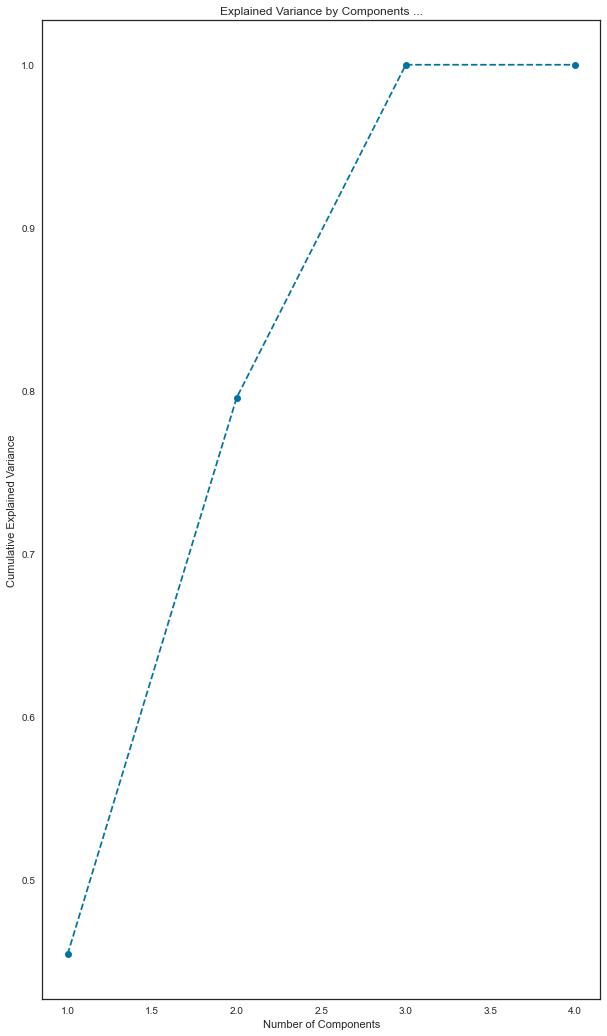

In [33]:
plt.figure(figsize = (10,18))
plt.plot(range(1,5), df_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components ...')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# A rule of thumb is to preserve around 90 % of the variance. So, in this case, we decide to keep 3 components.

In [34]:
pca_df = PCA(n_components = 3)
pca_df.fit(components_df)

PCA(n_components=3)

In [35]:
pca_df.transform(components_df)

array([[-2.85788602, -0.28310195,  1.8787874 ],
       [ 3.61021109, -0.25325629,  1.16168501],
       [-0.43062533, -2.55019844, -1.81144695],
       [-0.32169975,  3.08655668, -1.22902547]])

In [36]:
pca_score = pca_df.transform(components_df)

In [37]:
pca = PCA(n_components=3)

columns = ['PCA %i' % i for i in range(3)]
pca_score = pca_df.transform(components_df)

# creating PCA dataframe
scaled_df = pd.DataFrame(pca.fit_transform(components_df.T),columns=columns)
scaled_df

,PCA 0,PCA 1,PCA 2
0,-0.218382,-0.150704,0.207952
1,0.101304,-0.177737,0.059340
2,0.086025,0.240177,-0.005427
3,0.335308,-0.290368,0.134343
4,-0.150600,-0.081841,-0.279427
...,...,...,...
435,-0.205433,-0.192767,0.227319
436,0.033655,0.109256,-0.069170
437,-0.105128,-0.065217,0.355683
438,-0.181238,0.278497,-0.066502


In [38]:
components_df = components_df.T

In [39]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scaled_df)
    wcss.append(kmeans_pca.inertia_)

In [40]:
kmeans_pca

KMeans(n_clusters=10, random_state=42)

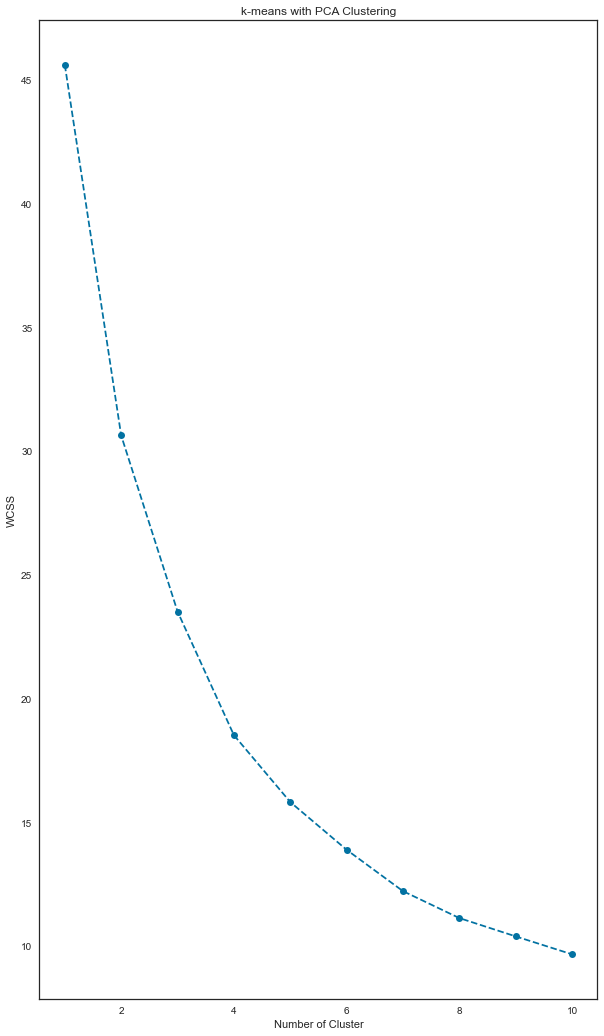

In [41]:
plt.figure(figsize = (10,18))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('k-means with PCA Clustering')
plt.show()

In [42]:
# Call the KMeans with only 4 clusters
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,algorithm='elkan')
kmeans_pca.fit(scaled_df)

KMeans(algorithm='elkan', n_clusters=4, random_state=42)

In [43]:
# Creating a new dataframe including 5 components
df_pca_kmeans = pd.concat([components_df.reset_index(drop = True), pd.DataFrame(scaled_df)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_pca_kmeans['Subgroup'] = kmeans_pca.labels_
df_pca_kmeans

,0,1,2,3,Component 1,Component 2,Component 3,Subgroup
0,0.329321,0.503964,0.152548,0.137125,-0.218382,-0.150704,0.207952,3
1,0.523798,0.347125,0.407343,0.235860,0.101304,-0.177737,0.059340,2
2,0.369148,0.073751,0.158911,0.469763,0.086025,0.240177,-0.005427,0
3,0.661145,0.188831,0.495766,0.067016,0.335308,-0.290368,0.134343,2
4,0.297062,0.545827,0.518437,0.575130,-0.150600,-0.081841,-0.279427,1
...,...,...,...,...,...,...,...,...
435,0.429194,0.600180,0.194167,0.165331,-0.205433,-0.192767,0.227319,3
436,0.435679,0.289007,0.301939,0.522852,0.033655,0.109256,-0.069170,0
437,0.336265,0.267915,0.000000,0.000000,-0.105128,-0.065217,0.355683,3
438,0.000000,0.053923,0.028539,0.399185,-0.181238,0.278497,-0.066502,1


In [44]:
# Labeling clusters
df_pca_kmeans['Subgroup'] = df_pca_kmeans['Subgroup'].map({0:'Grp1',2:'Grp3', 3:'Grp4'})

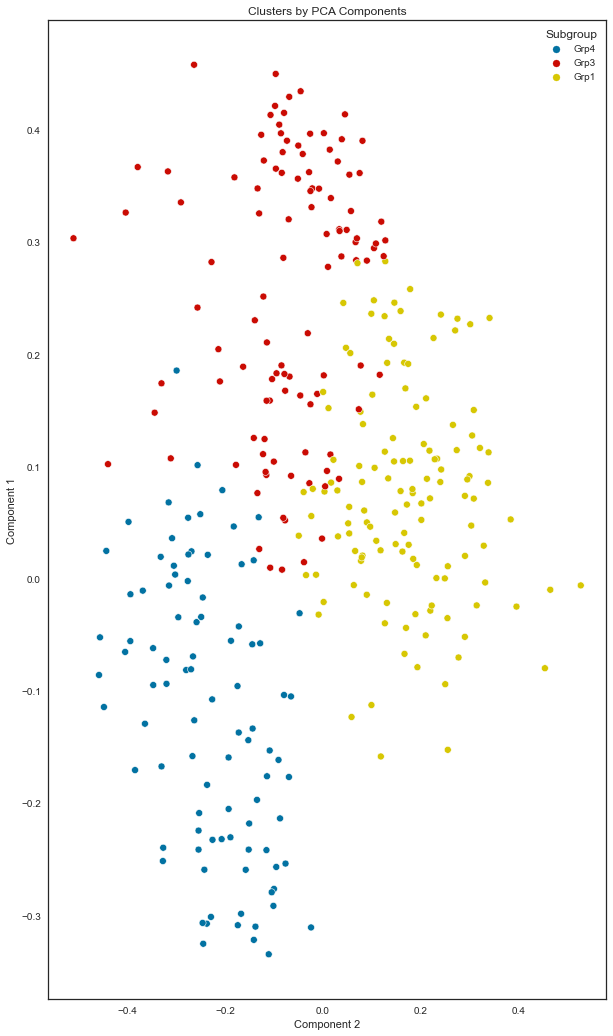

In [45]:
# Visualising the identified clusters by components
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize = (10,18))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Subgroup'], palette = ['b','r','y'])
plt.title('Clusters by PCA Components')
plt.show()

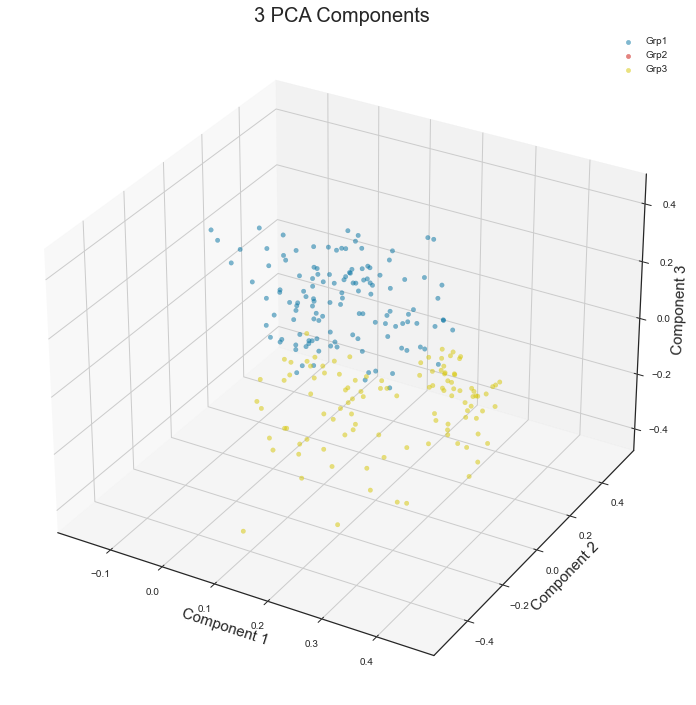

In [46]:
# Visualising the identified clusters by components (3D plot)

fig = plt.figure(figsize = (12,16))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 PCA Components', fontsize = 20)
targets = ['Grp1', 'Grp2', 'Grp3']
colors = ['b', 'r', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_kmeans['Subgroup'] == target
    ax.scatter(df_pca_kmeans.loc[indicesToKeep, 'Component 1']
               , df_pca_kmeans.loc[indicesToKeep, 'Component 2']
               , df_pca_kmeans.loc[indicesToKeep, 'Component 3']
               , c = color
               , s = 20
              , alpha=0.5)
ax.legend(targets)
ax.grid()

In [48]:
silhouette_coefficients = []
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_score)
    score = silhouette_score(pca_score, kmeans.labels_)
    silhouette_coefficients.append(score)

In [49]:
print(silhouette_coefficients)

[0.07335925016159492, 0.03812447996228426]


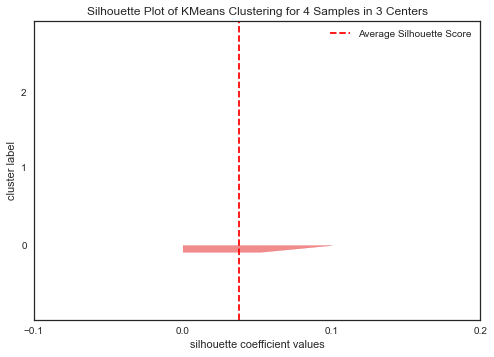

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(pca_score) 
visualizer.poof()   

In [51]:
cluster_labels= df_pca_kmeans['Subgroup'].values 
subgroups= components_df

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (10,10))

matrix = plot_confusion_matrix( y_true, cluster_labels, subgroups, cmap = plt.cm.Blues, ax=ax)

plt.title("Confusion matrix for test set")
ax.set_xlabel("Predicted Sub Group")
ax.set_ylabel("True Sub Group")
plt.show(matrix)
plt.show()

In [ ]:
# Clustering algorithm shows that the sub group column that was part of the original dataset helped in forming the
# clusters of samples. Using a different numbner of clusters could also show a trend through the data.

In [ ]:
# Question B

In [52]:
# Create feature and target arrays
y = balanced_dataset['Subgroup'].values
X = balanced_dataset.drop(['Subgroup'],axis=1)
# split the dataset into 30% for test set and 70% for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
X_train.shape, X_test.shape

((512, 441), (220, 441))

In [54]:
X

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Sub_Group
TCGA.VS.A9UV.CESC.C1_,11.791134,9.670770,7.379526,8.412312,8.494492,9.664051,6.209888,9.260463,8.733832,8.031864,...,7.341541,6.6972734,1.05783147,11.641623,9.610872,11.781192,5.1100374,0.000000000,0.00000000,1
TCGA.ZF.AA4U.BLCA.C1_,10.901855,11.458673,8.290954,6.382129,9.167403,9.951918,4.323183,7.243698,8.097005,7.700988,...,8.425602,1.6383056,0.61192777,11.233793,8.803418,12.929991,1.0401911,0.000000000,0.00000000,1
TCGA.LL.A9Q3.BRCA.C1_,9.449367,11.281414,7.254103,8.632312,9.409353,10.937639,8.129489,7.390745,8.210973,12.432336,...,9.717957,2.8209142,0.59024271,10.856970,7.618606,12.409728,6.5154759,0.000000000,0.00000000,1
TCGA.A8.A08X.BRCA.C1_,11.000218,10.567395,8.727219,9.602743,9.245284,8.463230,9.273740,7.607190,8.021352,10.788759,...,10.836918,4.2029035,2.00100953,10.975475,8.977672,12.347970,8.5373970,0.678612814,0.67861281,1
TCGA.D8.A143.BRCA.C1_,11.786106,10.176722,8.705629,9.088065,8.783840,8.735387,7.815876,8.098701,8.715842,8.155309,...,9.510942,4.6986241,1.86710573,10.731879,9.585819,11.183859,6.8438080,0.000000000,0.00000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.D8.A141.BRCA.C6_,9.935483,11.387118,8.944949,10.866954,8.615589,8.650883,9.555609,8.793824,7.564127,10.367731,...,11.809290,5.6733868,1.23970354,10.838274,8.587065,12.172227,8.4757456,0.000000000,0.00000000,6
TCGA.SH.A7BC.MESO.C6_,9.830102,12.276979,12.083795,10.641998,9.284815,9.747884,10.346059,9.249533,7.336739,11.344057,...,11.034091,10.5808050,2.08851478,10.748956,8.569711,13.365953,5.9196166,0.000000000,0.00000000,6
TCGA.43.2581.LUSC.C6_,10.162933,11.892930,10.868522,10.461776,9.506677,8.888749,11.244013,9.375967,7.052090,10.793555,...,11.078091,3.6039645,1.28682202,10.845843,8.367528,12.666686,6.2523627,0.000000000,0.00000000,6
TCGA.05.4425.LUAD.C6_,10.210123,11.325097,10.343486,9.984860,8.745668,9.571626,10.674104,9.305572,7.269033,11.633063,...,11.005512,6.2476617,2.12353377,10.616135,8.464591,11.729893,0.6411761,0.000000000,0.00000000,6


In [55]:
X_train

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Sub_Group
TCGA.DQ.5624.HNSC.C2_,10.698045,12.605283,10.505405,10.549390,9.254405,8.774250,8.477811,9.357761,6.291471,6.482138,...,10.079058,4.1983213,0.00000000,11.098624,8.023228,12.498740,15.2813469,0.000000000,0.00000000,2
TCGA.S7.A7WV.PCPG.C6_,8.998029,11.822085,13.487702,9.295858,8.387082,9.662626,8.833934,9.828500,7.385854,12.967262,...,11.355417,3.2125538,1.77917566,11.143441,7.868607,13.309618,0.5719195,0.000000000,0.98031783,6
TCGA.D8.A141.BRCA.C6_,9.935483,11.387118,8.944949,10.866954,8.615589,8.650883,9.555609,8.793824,7.564127,10.367731,...,11.809290,5.6733868,1.23970354,10.838274,8.587065,12.172227,8.4757456,0.000000000,0.00000000,6
TCGA.C5.A902.CESC.C2_,10.909421,8.946488,6.376073,9.081159,7.684131,9.081159,8.494312,8.251250,8.285985,9.950901,...,11.886992,3.4667968,3.04273188,10.713558,9.321581,11.814086,8.3665102,0.000000000,0.00000000,2
TCGA.HW.7490.LGG.C4_,9.155931,11.456909,8.939991,8.846581,9.491905,9.165500,8.390139,6.822743,6.840262,10.451355,...,10.158925,4.2583455,0.88252567,11.575506,6.356730,10.712252,0.0000000,0.000000000,1.63645062,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.56.7730.LUSC.C1_,11.813360,11.682793,10.185321,8.706444,6.475824,9.032922,5.647228,7.953329,8.930980,8.463201,...,8.562189,6.3623121,2.26234295,10.720398,9.663951,11.133110,0.3256167,0.000000000,0.00000000,1
TCGA.VS.A9V5.CESC.C1_,10.119226,11.531503,8.299199,7.435462,9.054729,9.165776,7.261578,8.224860,8.487691,7.063826,...,8.222549,4.9855323,0.56501218,10.970990,9.560421,12.063719,5.2262542,0.565012181,0.00000000,1
TCGA.KK.A8I5.PRAD.C3_,9.728085,11.778209,12.035614,6.089627,9.139723,10.243888,5.715191,10.085393,8.053535,7.668034,...,8.573897,6.2710521,3.26139542,11.572108,7.458439,12.005039,1.8813122,1.052137623,0.00000000,3
TCGA.CC.A7IF.LIHC.C4_,8.765995,6.951075,8.197212,6.787942,9.332475,10.494776,3.061638,5.541177,8.268121,17.734749,...,9.630285,1.6802343,0.00000000,11.133733,8.273068,11.261019,0.7948525,13.888210510,0.00000000,4


In [56]:
X_test

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Sub_Group
TCGA.CS.6668.LGG.C5_,8.825477,10.429511,6.591575,8.661493,9.193905,8.632046,3.936977,6.586466,5.807388,9.793732,...,9.259378,3.4887464,2.02421328,11.003026,6.747710,10.223254,0.0000000,0.000000000,2.83501453,5
TCGA.57.1582.OV.C1_,11.665381,11.087478,12.280958,8.546557,9.371284,10.009142,7.238826,6.846349,8.976639,9.420476,...,8.408270,2.1683259,3.07232233,9.670523,9.261231,11.786061,5.0316209,0.710084561,0.20416159,1
TCGA.CF.A47Y.BLCA.C3_,9.619169,10.817152,9.738307,8.080285,8.376824,10.533116,4.436562,9.661689,7.849380,8.426630,...,8.429030,4.7139047,1.44424299,10.839007,8.004956,11.440335,0.0000000,0.000000000,0.00000000,3
TCGA.KD.A5QT.SARC.C4_,10.304465,11.003588,11.432354,6.500495,8.565970,10.214550,5.111774,4.747318,8.086619,6.463116,...,9.539822,2.0312540,0.00000000,10.340985,8.659282,13.291415,1.3469852,0.000000000,0.00000000,4
TCGA.A1.A0SH.BRCA.C6_,10.537975,12.654703,9.698581,10.679084,8.153755,9.171620,8.988849,7.865554,6.905327,9.146098,...,11.349818,5.0188255,0.44487906,10.831822,8.655345,12.416259,7.3178286,0.000000000,0.78433646,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.E2.A1IO.BRCA.C3_,10.076295,11.005800,9.637893,10.039152,7.973973,8.408950,8.299451,8.559740,7.581713,8.712919,...,11.233913,4.8484327,1.31214236,10.516537,7.951419,11.872671,8.6675977,0.000000000,0.00000000,3
TCGA.DU.7304.LGG.C5_,9.143845,11.557483,8.174826,10.194264,8.402326,8.872669,9.051984,8.439374,7.513238,9.933301,...,10.236194,5.1657512,2.28608271,11.986340,6.996897,10.650397,2.1778859,0.000000000,3.48827077,5
TCGA.HT.7610.LGG.C5_,7.894351,10.818806,6.888877,10.058628,8.192209,8.200163,8.038315,8.404626,7.306016,9.292538,...,9.818736,5.2751188,1.23689055,12.222433,7.480653,10.138605,1.2368905,0.000000000,4.34117454,5
TCGA.QR.A6GW.PCPG.C3_,8.734865,8.937032,11.931465,7.942133,8.393764,9.890365,5.013802,9.700334,6.806053,7.275743,...,9.954429,2.9316452,1.30643724,11.793225,7.209073,10.870711,0.0000000,0.000000000,0.45238458,3


In [57]:
y

array(['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2',
       'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2',
       'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C

In [58]:
# classifier with default parameters
svc=SVC(kernel='rbf') # 
# fit to training set
svc.fit(X_train, y_train)
# predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
# print accuracy %
print("Accuracy for our dataset in predicting test data when using default parameteres is : {:.2f}%" .format(accuracy))

Accuracy for our dataset in predicting test data when using default parameteres is : 79.09%


In [59]:
parameters = [{'C': [0.1,1,10,100,1000], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}]
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', cv=10) # 
grid_search = grid_search.fit(X_train, y_train)

In [60]:
# best params after tuning
print(grid_search.best_params_)
# best params after hyper-parameter tuning
print(grid_search.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [61]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our dataset with tuning is : {:.2f}%" .format(accuracy))

Accuracy for our dataset with tuning is : 89.06%


In [62]:
# instantiate classifier with optimal hyperparameters
svc=SVC(C=1, gamma=1, kernel='rbf')
# fit classifier to training set
clf=svc.fit(X_train, y_train)

In [63]:
# make predictions on test set
y_pred = svc.predict(X_test)
# compute and print accuracy score
acc = accuracy_score(y_test, y_pred) *100
# print accuracy %
print("Accuracy for our dataset in predicting test data (when using the best parameteres) is : {:.2f}%" .format(acc))

Accuracy for our dataset in predicting test data (when using the best parameteres) is : 30.45%


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          C1       1.00      0.14      0.24        43
          C2       0.18      1.00      0.31        34
          C3       1.00      0.07      0.13        42
          C4       1.00      0.10      0.18        41
          C5       1.00      0.25      0.40        36
          C6       1.00      0.46      0.63        24

    accuracy                           0.30       220
   macro avg       0.86      0.34      0.32       220
weighted avg       0.87      0.30      0.29       220



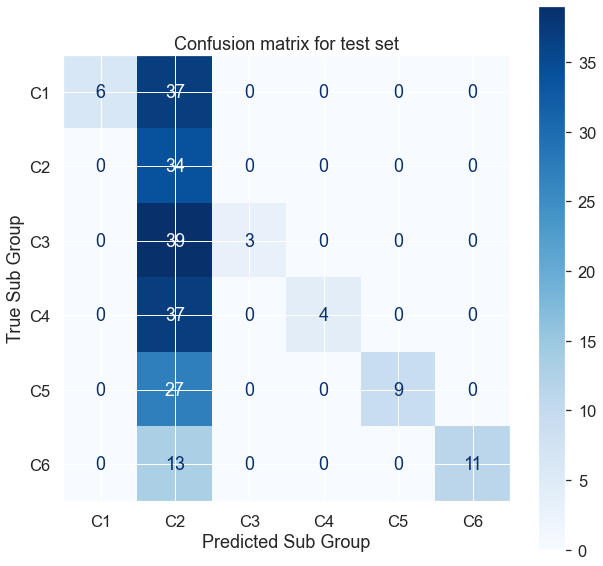

In [65]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (10,10))

matrix = plot_confusion_matrix(svc, X_test, y_test, cmap = plt.cm.Blues, ax=ax)

plt.title("Confusion matrix for test set")
ax.set_xlabel("Predicted Sub Group")
ax.set_ylabel("True Sub Group")
plt.show(matrix)
plt.show()

In [ ]:
# The confusion matrix above shows me that the accuracy of the data could still be improved on. If you look at each
# of the labels there isn't a very clear trend. We can see that a lot of the predicted samples for groups C1, C3, C4,
# C5 and C6 are placed with the predicted C2 making them false negative. On the other hand, a lot of the samples for
# C2 for predicted and the true align, therefore showing the model can be quite accurate.

# Through each of the groups we can see how well the model is doing, C1 has 6 samples that are accurate, C2 has 34
# samples that are accurate, C3 has 3 samples that are accurate, C4 has 4 samples that are accurate, C5 has 9 samples
# that are accurate and C6 has 11 samples that are accurate. Overall, C2 has is the group with the most accurate
# samples. Out of the 220 samples 30.45% are very accurate. This is not a very high number, therefore the model 
# still can be further improved. Ways that the model could be improved to be more accurate consist of: adding more
# data, treating missing values/outliers through imputation, feature engineering to get more information from existing
# data, using multiple algorithms, tuning algorithms, using ensemble methods to combine weaker models and using 
# cross validation.